In [137]:
import pandas as pd
import gzip
import ast
import json
#from funciones import missing_values_table
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

# Funciones

In [138]:
def missing_values_table(df):
    '''
    Se pasa como parametro un df de pandas, devuelve la 
    cantidad de valores NaN y a que porcentaje del total de valores corresponen
    
    '''
    
    mis_val = df.isna().sum()
    mis_val_percent = 100 * df.isna().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

# 1 Extraccion

In [139]:
# Lista para almacenar los datos JSON
datos = []

# Abrir el archivo comprimido y descomprimirlo
with gzip.open(r'./Dataset/steam_games.json.gz', 'rt', encoding='utf-8') as archivo:
    for linea in archivo:
        objeto_json = json.loads(linea)
        datos.append(objeto_json)

steam_games=pd.DataFrame(datos)

In [140]:
steam_games.tail()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns"
120444,NaN,NaN,Maze Run VR,NaN,http://store.steampowered.com/app/681550/Maze_...,NaN,"[Early Access, Adventure, Indie, Action, Simul...",http://steamcommunity.com/app/681550/reviews/?...,"[Single-player, Stats, Steam Leaderboards, HTC...",4.99,True,681550,NaN


Eliminamos si tiene toda una fila nula

In [141]:
steam_games.dropna(how='all',inplace=True)
# Resetea el índice
steam_games = steam_games.reset_index()
steam_games.shape

(32135, 14)

# Guardas datos

In [142]:
steam_games.to_csv('./steam_games.csv', index=False)

## Funcion 1
def developer( desarrollador : str ): Cantidad de items y porcentaje de contenido Free por año según empresa desarrolladora. Ejemplo de retorno:

### Transformacion

PRICE float

In [143]:
print('cantidad de nulos: ',steam_games['price'].isnull().sum())
print('tipo de dato: ',steam_games['price'].dtype)
print('cantidad datos',steam_games.shape)
steam_games['price'].iloc[4000]

cantidad de nulos:  1377
tipo de dato:  object
cantidad datos (32135, 14)


0.99

normalizamos

In [144]:
#chequeamos los valores unicos para hacer replace() y poder cambiar el tipo de datos a uno manipulable.
print(pd.unique(steam_games['price']))

[4.99 'Free To Play' 'Free to Play' 0.99 2.99 3.99 9.99 18.99 29.99 nan
 'Free' 10.99 1.59 14.99 1.99 59.99 8.99 6.99 7.99 39.99 19.99 7.49 12.99
 5.99 2.49 15.99 1.25 24.99 17.99 61.99 3.49 11.99 13.99 'Free Demo'
 'Play for Free!' 34.99 74.76 1.49 32.99 99.99 14.95 69.99 16.99 79.99
 49.99 5.0 44.99 13.98 29.96 119.99 109.99 149.99 771.71 'Install Now'
 21.99 89.99 'Play WARMACHINE: Tactics Demo' 0.98 139.92 4.29 64.99
 'Free Mod' 54.99 74.99 'Install Theme' 0.89 'Third-party' 0.5 'Play Now'
 299.99 1.29 3.0 15.0 5.49 23.99 49.0 20.99 10.93 1.39
 'Free HITMAN™ Holiday Pack' 36.99 4.49 2.0 4.0 9.0 234.99 1.95 1.5 199.0
 189.0 6.66 27.99 10.49 129.99 179.0 26.99 399.99 31.99 399.0 20.0 40.0
 3.33 199.99 22.99 320.0 38.85 71.7 59.95 995.0 27.49 3.39 6.0 19.95
 499.99 16.06 4.68 131.4 44.98 202.76 1.0 2.3 0.95 172.24 249.99 2.97
 10.96 10.0 30.0 2.66 6.48 19.29 11.15 18.9 2.89 'Play the Demo' 99.0
 87.94 599.0 8.98 9.69 0.49 9.98 9.95 7.0 'Starting at $499.00'
 'Starting at $449.00' 12.8

In [145]:
steam_games.replace(['Free To Play', 'Free to Play', 'Free', 'Free Demo', 'Play for Free!', 'Install Now',
                  'Play WARMACHINE: Tactics Demo', 'Free Mod', 'Install Theme', 'Third-party', 'Play Now',
                  'Free HITMAN™ Holiday Pack', 'Play the Demo', 'Free to Try', 'Free Movie', 'Free to Use'], '0.00', inplace=True)

In [146]:
#consola, no video juego
steam_games[steam_games['price'] == 'Starting at $499.00']

,index,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
25000,113310,NaN,NaN,Syber Steam Machine,Syber Steam Machine,http://store.steampowered.com/app/353420/Syber...,2015-11-10,"[Steam Machine, Hardware]",http://steamcommunity.com/app/353420/reviews/?...,NaN,Starting at $499.00,False,353420,NaN


In [147]:
#tampoco es un juego, es otra consola
steam_games[steam_games['price'] == 'Starting at $449.00']

,index,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
25001,113311,NaN,NaN,Alienware Steam Machine,Alienware Steam Machine,http://store.steampowered.com/app/353390/Alien...,2015-11-10,"[Steam Machine, Hardware, Gaming, Futuristic, ...",http://steamcommunity.com/app/353390/reviews/?...,NaN,Starting at $449.00,False,353390,NaN


Elimino dado index

In [148]:
steam_games.drop([113310, 113311], inplace=True)

KeyError: '[113310, 113311] not found in axis'

Imputamos valores<br>
EDA

In [149]:
print('cantidad de nulos: ',steam_games['price'].isnull().sum())
print('tipo de dato: ',steam_games['price'].dtype)
print('cantidad datos',steam_games.shape)
steam_games['price'].iloc[0]

cantidad de nulos:  1377
tipo de dato:  object
cantidad datos (32135, 14)


4.99

In [150]:
steam_games['price'] = pd.to_numeric(steam_games['price'], errors='coerce')

a) histograma

<Axes: >

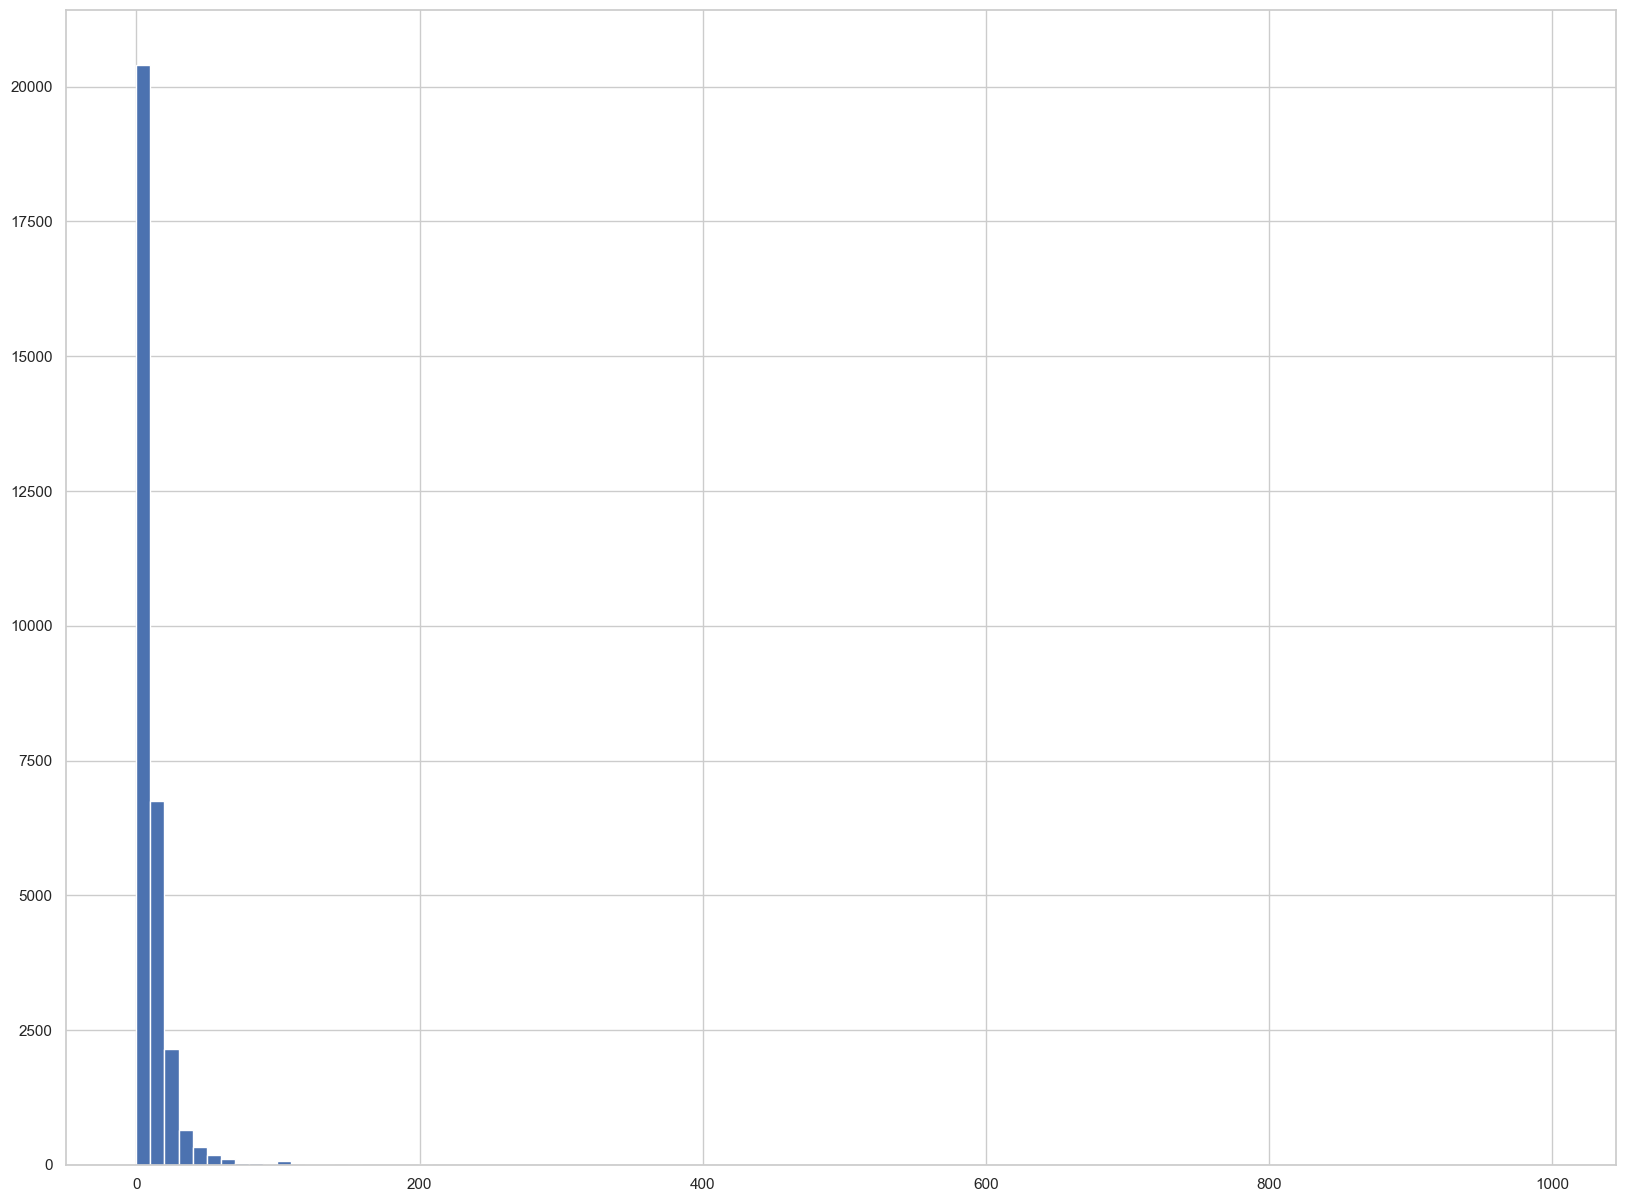

In [ ]:
#steam_games['price'].hist()
steam_games['price'].hist(bins = 100, figsize= (20,15))

b) boxplot

Text(0.5, 1.0, 'Precio')

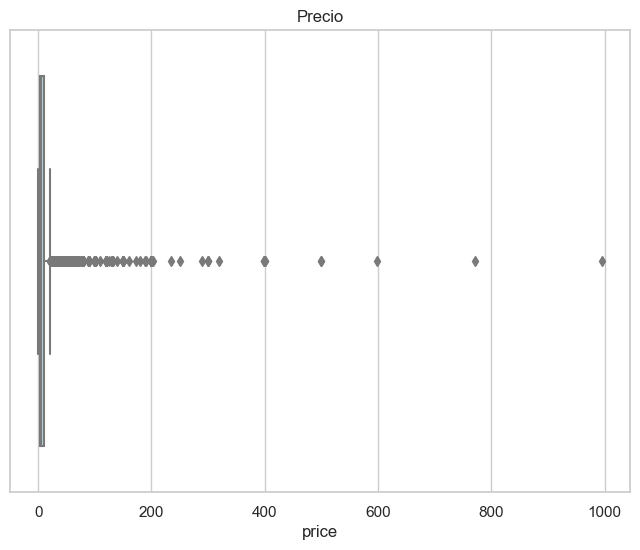

In [ ]:
# Crea un boxplot de una columna específica en el DataFrame
sns.set(style="whitegrid")  # Establece el estilo del gráfico
plt.figure(figsize=(8, 6))  # Opcional: establece el tamaño del gráfico

sns.boxplot(data=steam_games, x='price', color='lightblue')
plt.title("Precio")


c) plot scatter

[Text(0.5, 0, 'price'), Text(0, 0.5, 'cantidad')]

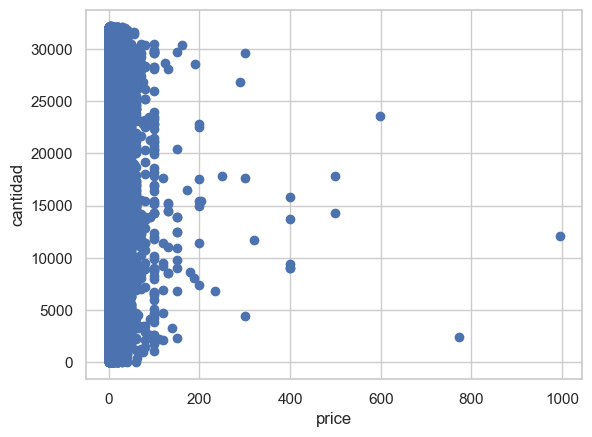

In [ ]:
fig = plt.figure()
ax = plt.axes()
# Crea una lista de valores para el eje X
eje_x = list(range(1, len(steam_games.price) + 1))

ax.scatter(steam_games.price,eje_x)
ax.set(xlabel='price', ylabel='cantidad')

c) convertir a entero e imputar datos

In [151]:
media=steam_games.sort_values(by='price')['price'].median()
media

4.99

In [160]:
steam_games['price'].fillna(media,inplace=True) # En el EDA se ve que tiene como una distribucion normal por ende se pone la media
steam_games['price'] = steam_games['price'].astype(float) # Convierto a tipo entero

PUBLISHER str

In [185]:
print('cantidad de nulos: ',steam_games['publisher'].isnull().sum())
print('tipo de dato: ',steam_games['publisher'].dtype)
print('cantidad datos',steam_games.shape)
steam_games['publisher'].iloc[4000]

cantidad de nulos:  0
tipo de dato:  object
cantidad datos (24083, 14)


'Dovetail Games - Trains'

Elimino dado una columna los nulos que tiene

In [184]:
#elimino columna que no voy a utilizar
#steam_games.drop(columns= '', inplace=True)
#steam_games.drop([113310, 113311], inplace=True)
#steam_games.dropna(how='all',inplace=True)

# Elimina filas con valores nulos en la columna 'nombre_de_la_columna'
steam_games = steam_games.dropna(subset=['publisher'])
steam_games['publisher'] = steam_games['publisher'].astype(str) # Convierto a tipo string

RELEASE DATE

In [187]:
print('cantidad de nulos: ',steam_games['release_date'].isnull().sum())
print('tipo de dato: ',steam_games['release_date'].dtype)
print('cantidad datos',steam_games.shape)
steam_games['release_date'].iloc[0]

cantidad de nulos:  0
tipo de dato:  datetime64[ns]
cantidad datos (23793, 14)


Timestamp('2018-01-04 00:00:00')

In [186]:
steam_games['release_date'] = pd.to_datetime(steam_games['release_date'], format='%Y-%m-%d', errors='coerce')
steam_games = steam_games.dropna(subset = ['release_date']) #eliminare los nulos ya que despues no puedo iterar ademas como se vio son poco

Transformaciones Auxiliares

In [190]:
# Extrae el año de la columna "fecha"
steam_games['release_year'] = steam_games['release_date'].dt.year

In [208]:
steam_games.to_csv('consulta1.csv', index=False)

#### Hasta aca los datos limpios

# 1

In [197]:
# Cuenta los valores duplicados en la columna "columna1"
conteo_duplicados = steam_games['publisher'].value_counts()
conteo_duplicados

publisher
Ubisoft                    384
Dovetail Games - Trains    360
Degica                     286
Paradox Interactive        268
SEGA                       250
                          ... 
Amkonius Games               1
CurriculaWorks               1
Colorspace Studio            1
Fusion.Robot &amp; Co        1
Bidoniera Games              1
Name: count, Length: 8093, dtype: int64

In [199]:
# Agrupado
filtrado=steam_games[steam_games['publisher']=="Ubisoft"].groupby('release_year')['price'].agg([('Cantidad free',lambda x:(x==0.00).sum()),('Totoal elementos','count')]).reset_index()
filtrado

,release_year,Cantidad free,Totoal elementos
0,1999,0,1
1,2001,0,1
2,2002,0,3
3,2003,0,4
4,2004,0,2
5,2005,0,7
6,2006,0,6
7,2007,0,6
8,2008,0,9
9,2009,0,3


In [206]:
filtrado['porcentaje_free']= filtrado.apply(lambda x:round(x['Cantidad free']/x['Totoal elementos'],2)*100 if x['Totoal elementos']!= 0 else 0,axis=1)
filtrado

,release_year,Cantidad free,Totoal elementos,porcentaje_free
0,1999,0,1,0.0
1,2001,0,1,0.0
2,2002,0,3,0.0
3,2003,0,4,0.0
4,2004,0,2,0.0
5,2005,0,7,0.0
6,2006,0,6,0.0
7,2007,0,6,0.0
8,2008,0,9,0.0
9,2009,0,3,0.0


In [211]:
type(filtrado['release_year'].iloc[0])

numpy.int32

In [212]:
[fila for fila in filtrado['release_year']]

[1999,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

# 2 

In [198]:
#filtrado=steam_games[steam_games['publisher']=="Ubisoft"].groupby('release_year').agg(persiofree=('price',lambda x: x if x==0.#00))[['publisher','price','release_year']]
#filtrado.head()

,publisher,price,release_year
126,Ubisoft,9.99,2003
127,Ubisoft,9.99,2004
129,Ubisoft,9.99,2006
130,Ubisoft,9.99,2005
139,Ubisoft,9.99,2007
...,...,...,...
31796,Ubisoft,4.99,2002
31800,Ubisoft,9.99,2005
31816,Ubisoft,9.99,2006
31817,Ubisoft,9.99,2006


In [176]:
steam_games['publisher'].count()

24083

publisher
Ubisoft                    385
Dovetail Games - Trains    360
Degica                     286
Paradox Interactive        271
SEGA                       251
                          ... 
MB² Entertainment            1
Back Of Nowhere Studios      1
Fourfold Games               1
Atomic Wolf                  1
Bidoniera Games              1
Name: count, Length: 8239, dtype: int64

In [165]:
missing_values_table(steam_games)

Your selected dataframe has 14 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
specs,285,1.2
genres,128,0.5
tags,98,0.4
developer,65,0.3
release_date,17,0.1
reviews_url,1,0.0
id,1,0.0


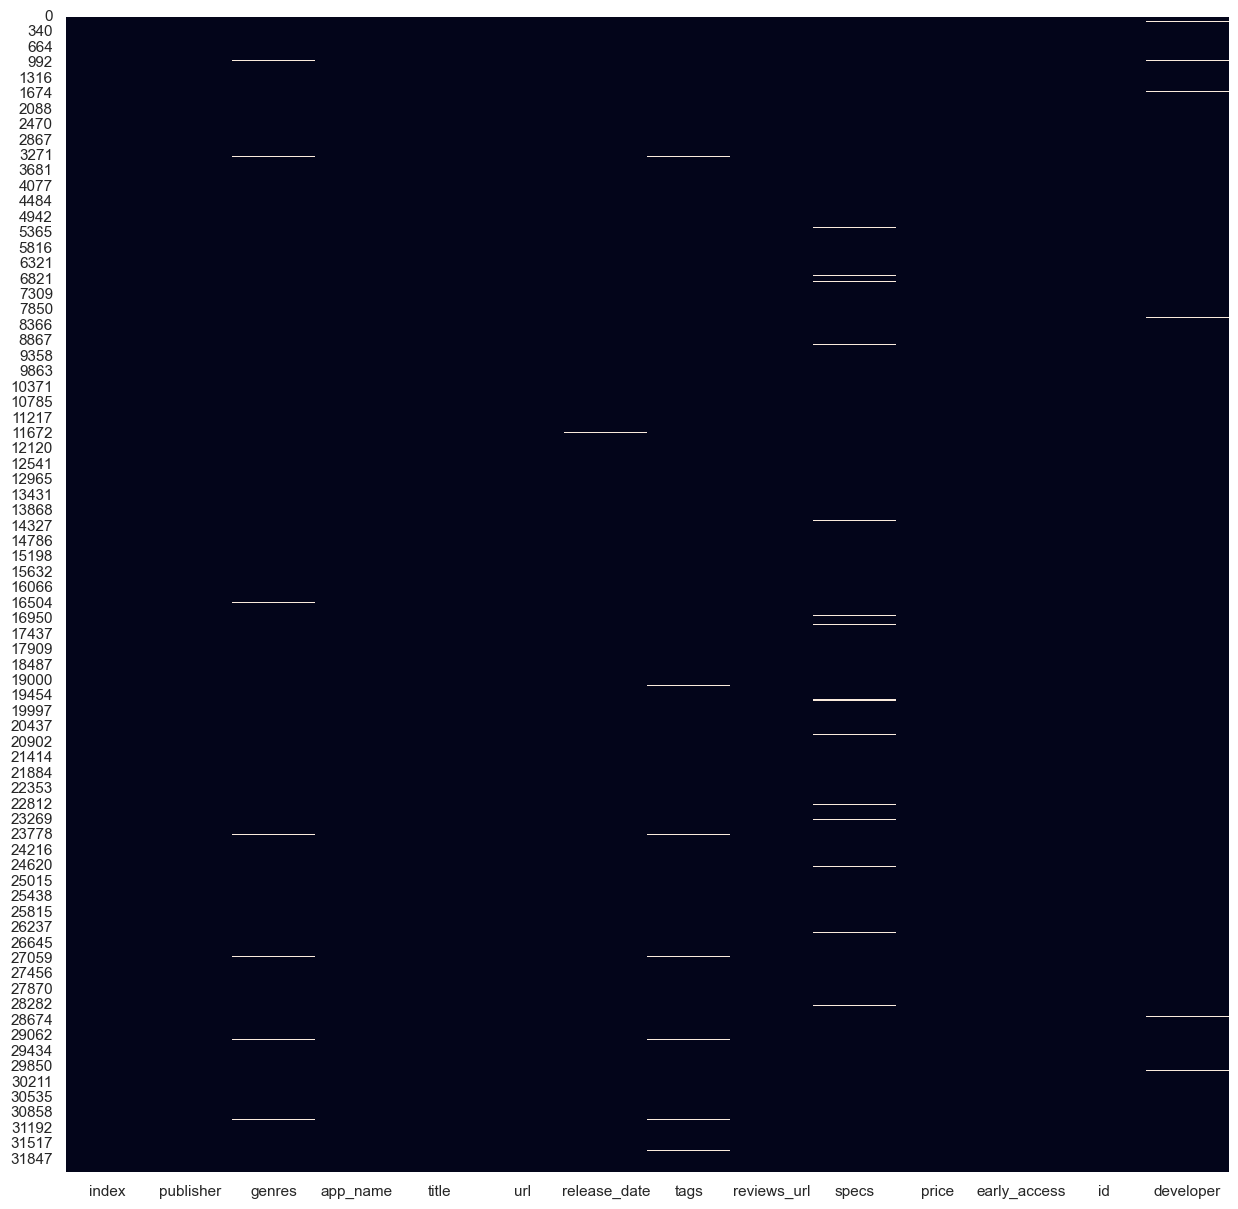

In [166]:
# Reemplazar todos los valores NaN por nan
df_games = steam_games.fillna(np.nan)
#Observamos graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_games.isnull(), cbar=False)
plt.show()